# <center> IIIT Vadodara </center>
## <center> Winter 2022-23 </center>
## <center> CS/IT 308 Machine Learning Lab</center>
## <center> Lab#6 Support vector machine (SVM)</center>

**Problem 1)** Classify the given data using linear SVM algorithm.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [4]:
# linear data
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

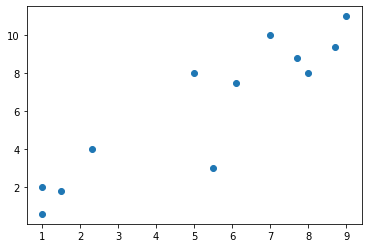

In [5]:
# show unclassified data
plt.scatter(X, y)
plt.show()

In [6]:
# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [9]:
# define the model
svm_model = svm.SVC(kernel='linear', C=1.0)

In [10]:
# train the model
svm_model.fit(training_X, training_y)

SVC(kernel='linear')

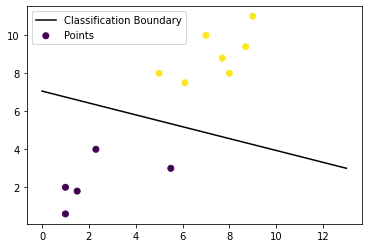

In [11]:
# get the weight values for the linear equation from the trained SVM model
weight = svm_model.coef_[0]

# get the y-offset for the linear equation
y_offset = -weight[0] / weight[1]

# make the x-axis space for the data points
x_values = np.linspace(0, 13)

# get the y-values to plot the decision boundary
y_values = y_offset * x_values - svm_model.intercept_[0] / weight[1]

# plot the decision boundary
plt.plot(x_values, y_values, 'k-',label='Classification Boundary')

# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y,label='Points')
plt.legend()
plt.show()

**Problem 2)** Load the data. The data description can be found in below link.

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

<br>

Split the data to train and test set. More information can be found here.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

<br>

Write a code for linear SVM model. Examples can be found here.

https://github.com/soloice/SVM-python

https://gist.github.com/mblondel/586753/f740949d0336484567dd422fe53445ac8821f5b2

<br>

Learn and test the model for different hyperparameters and check the accuracy.


In [14]:
#Write your code here.
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split

data = pd.read_csv('data_banknote_authentication.txt', sep=",", header=None)
data = np.array(data)
print(data)

X = data[:,:-1]
Y = data[:,-1]
training_X,testing_X,training_Y,testing_Y = train_test_split(X,Y,test_size=0.33,random_state=23)

[[  3.6216    8.6661   -2.8073   -0.44699   0.     ]
 [  4.5459    8.1674   -2.4586   -1.4621    0.     ]
 [  3.866    -2.6383    1.9242    0.10645   0.     ]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771    1.     ]
 [ -3.5637   -8.3827   12.393    -1.2823    1.     ]
 [ -2.5419   -0.65804   2.6842    1.1952    1.     ]]


In [18]:
#Linear SVM
svm_model = svm.SVC(kernel='linear')
svm_model.fit(training_X,training_Y)
predict_Y = svm_model.predict(testing_X)

print("Accuracy : ",metrics.accuracy_score(testing_Y, predict_Y))
print("Precision : ",metrics.precision_score(testing_Y, predict_Y))
print("Recall : ",metrics.recall_score(testing_Y, predict_Y))

Accuracy :  0.9867549668874173
Precision :  0.9760765550239234
Recall :  0.9951219512195122


In [19]:
#Non-linear(RBF) SVM
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(training_X,training_Y)
predict_Y = svm_model.predict(testing_X)

print("Accuracy : ",metrics.accuracy_score(testing_Y, predict_Y))
print("Precision : ",metrics.precision_score(testing_Y, predict_Y))
print("Recall : ",metrics.recall_score(testing_Y, predict_Y))

Accuracy :  0.9955849889624724
Precision :  0.9903381642512077
Recall :  1.0


In [20]:
#Non-linear(Polynomial) SVM
svm_model = svm.SVC(kernel='poly')
svm_model.fit(training_X,training_Y)
predict_Y = svm_model.predict(testing_X)

print("Accuracy : ",metrics.accuracy_score(testing_Y, predict_Y))
print("Precision : ",metrics.precision_score(testing_Y, predict_Y))
print("Recall : ",metrics.recall_score(testing_Y, predict_Y))

Accuracy :  0.9558498896247241
Precision :  0.9111111111111111
Recall :  1.0


**Problem 3)** Classify the given data using non-linear SVM.


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

In [22]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

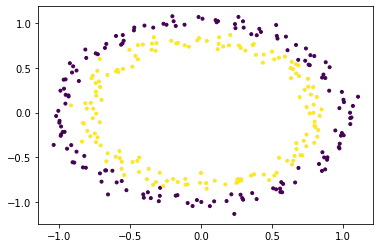

In [23]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [24]:
# make non-linear algorithm for model
svm_model = svm.SVC(kernel='rbf', C=1.0)

In [25]:
# training non-linear model
svm_model.fit(circle_X,circle_y)

SVC()

In [28]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, axis=None):
    if axis is None:
        axis = plt.gca()
        
    x_limits = axis.get_xlim()
    y_limits = axis.get_ylim()
    
    # create grid to evaluate model
    x_values = np.linspace(x_limits[0], x_limits[1], 30)
    y_values = np.linspace(y_limits[0], y_limits[1], 30)
    y_grid, x_grid = np.meshgrid(y_values, x_values)

	  # shape data
    xy = np.vstack([x_grid.ravel(), y_grid.ravel()]).T
    
	  # get the decision boundary based on the model
    decision_boundary = model.decision_function(xy).reshape(x_grid.shape)
    
    # plot decision boundary
    axis.contour(x_grid, y_grid, decision_boundary, levels=[0], alpha=0.5, linestyles=['-'])

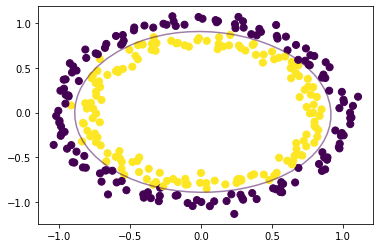

In [29]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(svm_model)
plt.show()